# Preparación de Datos - Devoluciones Gaviequipos
Por :
* Felipe Loaiza Martinez
* Clara Isabela Otalvaro Agudelo

2. (1.0) Desarrollar un jupyter notebook de preparación de datos en Python, incluyendo todos los pasos vistos en clase. Documentar los resultados en el informe de la metodología. Incluir el pandas profiling de los datos.

#3. PREPARACIÓN DE DATOS
  3.1 INTEGRACIÓN

  3.2 SELECCIÓN DE VARIABLES

  3.3 DESCRIPCIÓN ESTADÍSTICA

  3.4 LIMPIEZA DE ATÍPICOS

  3.5 LIMPIEZA DE NULOS

  3.6 CREACIÓN DE NUEVAS VARIABLES

  3.7 ANÁLISIS DE CORRELACIONES PARA REDUNDANCIA

  3.8 ANÁLISIS DE CORRELACIONES PARA IRRELEVANCIA (PREDICCIONES)

  3.9 REDUCCIÓN DE DIMENSIÓN (OPCIONAL EN PREDICCIONES)

  3.10 BALANCEO (CLASIFICACIÓN)
  
  3.11 TRANSFORMACIONES

In [714]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Integración

In [715]:
rawdata = pd.read_excel("DEV DETALLE.xls")

WARNING *** file size (25762193) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [716]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13313 entries, 0 to 13312
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   art_clave_int            13313 non-null  int64         
 1   bod_clave_int            13313 non-null  int64         
 2   ded_cant_predevol        13313 non-null  int64         
 3   ded_inspeccion_cantidad  13313 non-null  int64         
 4   ded_cantidad             13313 non-null  int64         
 5   ded_limpieza_cantidad    13313 non-null  int64         
 6   ded_limpieza_valor       13313 non-null  int64         
 7   ded_reparacion_cantidad  13313 non-null  int64         
 8   ded_reparacion_valor     13313 non-null  int64         
 9   ded_rep_may_cant         13313 non-null  int64         
 10  ded_rep_may_valor        13313 non-null  int64         
 11  ded_reposicion_cantidad  13313 non-null  int64         
 12  ded_reposicion_valor     13313 n

In [717]:
data = rawdata[["ded_cant_predevol", "ded_cantidad", "ded_reparacion_valor", "ded_reposicion_cantidad", "ded_reposicion_valor", "art_nombre", "art_vr_reposicion", "cco_nombre", "cli_nombre"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13313 entries, 0 to 13312
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ded_cant_predevol        13313 non-null  int64 
 1   ded_cantidad             13313 non-null  int64 
 2   ded_reparacion_valor     13313 non-null  int64 
 3   ded_reposicion_cantidad  13313 non-null  int64 
 4   ded_reposicion_valor     13313 non-null  int64 
 5   art_nombre               13313 non-null  object
 6   art_vr_reposicion        13313 non-null  int64 
 7   cco_nombre               13313 non-null  object
 8   cli_nombre               13313 non-null  object
dtypes: int64(6), object(3)
memory usage: 936.2+ KB


In [718]:
data.drop('ded_cantidad', inplace=True, axis=1)
data.drop('ded_reposicion_cantidad', inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13313 entries, 0 to 13312
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ded_cant_predevol     13313 non-null  int64 
 1   ded_reparacion_valor  13313 non-null  int64 
 2   ded_reposicion_valor  13313 non-null  int64 
 3   art_nombre            13313 non-null  object
 4   art_vr_reposicion     13313 non-null  int64 
 5   cco_nombre            13313 non-null  object
 6   cli_nombre            13313 non-null  object
dtypes: int64(4), object(3)
memory usage: 728.2+ KB


<ipython-input-718-895e95c1efdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('ded_cantidad', inplace=True, axis=1)
<ipython-input-718-895e95c1efdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('ded_reposicion_cantidad', inplace=True, axis=1)


## Descripción Estadistica

In [719]:
#Primero convertimos las variables tipo object en variables categoricas
data["art_nombre"] = data["art_nombre"].astype('category')
data["cco_nombre"] = data["cco_nombre"].astype('category')
data["cli_nombre"] = data["cli_nombre"].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13313 entries, 0 to 13312
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ded_cant_predevol     13313 non-null  int64   
 1   ded_reparacion_valor  13313 non-null  int64   
 2   ded_reposicion_valor  13313 non-null  int64   
 3   art_nombre            13313 non-null  category
 4   art_vr_reposicion     13313 non-null  int64   
 5   cco_nombre            13313 non-null  category
 6   cli_nombre            13313 non-null  category
dtypes: category(3), int64(4)
memory usage: 543.8 KB


<ipython-input-719-ae4e149539ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["art_nombre"] = data["art_nombre"].astype('category')
<ipython-input-719-ae4e149539ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cco_nombre"] = data["cco_nombre"].astype('category')
<ipython-input-719-ae4e149539ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [720]:
data.describe()

,ded_cant_predevol,ded_reparacion_valor,ded_reposicion_valor,art_vr_reposicion
count,13313.000000,1.331300e+04,1.331300e+04,1.331300e+04
mean,23.953204,3.444077e+03,4.693082e+03,4.184280e+05
std,111.202927,2.520004e+04,5.568854e+04,1.226288e+06
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,2.500000e+04
50%,1.000000,0.000000e+00,0.000000e+00,1.000000e+05
75%,15.000000,0.000000e+00,0.000000e+00,2.000000e+05
max,2650.000000,1.445000e+06,2.900000e+06,7.700000e+06


In [721]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [722]:
# from pandas_profiling import ProfileReport

In [723]:
# profile = data.profile_report(title='Pandas Profiling Report')
# profile

In [724]:
len(data["art_nombre"].cat.categories.tolist())

223

In [725]:
#EQUIPO_ELECTRONICO
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('CONCRETADORA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('CORTADORA ADOBE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('ALLANADORA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('TALADRO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('VIBRADOR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('VIBROCOMPACTADOR ') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('BOMBA ') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('PLUMA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('CANGURO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('COMPRESOR DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('PULIDORA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('CORTADORA DE BALDOSIN') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('MUELA PARA TALADRO DEMOLEDOR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('PLATO PROTECTOR ALLANADORA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('MANGUERA') else x)

#Equipo MULTIDIRECCIONAL CERTIFICADO
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('VIBROCOMPACTADOR ') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('ABRAZADERA DALMINE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('BARANDA INTERNA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('BASE COLLAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('DIAGONAL DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('VIBROCOMPACTADOR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('ESCALERA VERTICAL') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('HORIZONTAL DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('PLATAFORMA DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('PIVOTE MULTIDIRECCIONAL') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('RUEDA DE ANDAMIO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('TORNILLO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('VERTICAL DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('BARANDA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('ESCALERA DE ACCESO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_multi' if x.startswith('ESCALERA DE 3') else x)

#Tablero Modulares
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('TABLERO DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('ALINEADOR MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('ANGULO MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('CORBATA MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('PIN MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('UÑA   MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('TUBO MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('TENSOR MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('TABLERO MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('ALINEADOR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('GRAPA MODULAR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('RINCONERA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Tableros_Modulares' if x.startswith('EXTRACTOR DE CORBATA') else x)

#ANDAMIOS
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('ANDAMIO COLGANTE DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('ANDAMIOS COLGANTES') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('ARNES DE SEGURIDAD CON ESLINGA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('ESCALERA INTERNA PARA ANDAMIO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('MARCO DE TIJERA ANGOSTO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('PASAMANOS PARA ANDAMIOS') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('RUEDAS GIRATORIAS') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('TIJERAS PARA ANDAMIOS') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('GRILLETES PARA ANDAMIOS COLGANTES') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Andamios' if x.startswith('CHAPOLA') else x)

#FORMALETA
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('ANDAMIOS COLGANTES') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('TACO METALICO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('TAPA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('TELERAS') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('CANES DE MADERA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('CUÑAS') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('CERCHA METALICA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Formaleta' if x.startswith('CERCHAS METALICAS') else x)

#Herramientas
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('CHAPETAS DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('CILINDRO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('CINCEL') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('MOLINETES') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('CONO SLUM') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('PALA COCA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('PIZONES') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('BALDE PARA PLUMA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('VARILLA TENSORA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('POLEA SENCILLA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('PISTOLA PARA COMPRESOR') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('PICA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('DIFERENCIAL DE 3 TONELADAS') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('EXTENSION DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('EXTENSIÓN DE') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('ALMADANA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('ESCALERA DE TIJERA') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('ESCALERA DE 12 PELDAÑOS EN ALUMINIO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('ESCALERA DE 8 PELDAÑOS EN ALUMINIO') else x)
data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Herramienta' if x.startswith('TRIPODE') else x)

<ipython-input-725-40941b9db773>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('CONCRETADORA') else x)
<ipython-input-725-40941b9db773>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['art_nombre'] = data['art_nombre'].apply(lambda x: 'Equipo_Electronico' if x.startswith('CORTADORA ADOBE') else x)
<ipython-input-725-40941b9db773>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [726]:
data['art_nombre'] = data['art_nombre'].astype('category')

<ipython-input-726-fc17abf88902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['art_nombre'] = data['art_nombre'].astype('category')


In [727]:
categories_art_nombre = data["art_nombre"].cat.categories.tolist()
print(len(data["art_nombre"].cat.categories.tolist()))
categories_art_nombre

28


['Andamios',
 'CANES METALICOS',
 'COCHE CON LLANTA NEUMATICA',
 'Equipo_Electronico',
 'Equipo_multi',
 'Formaleta',
 'HIDROLAVADORA CON CARRITO Y LLAVE A 110 VOL',
 'Herramienta',
 'LAMINA CUBREBRECHA (SUB)',
 'LAZO DE 20 METROS',
 'LAZO DE 29 METROS',
 'LINEA DE VIDA DE 50 MTS',
 'MAQUINA DE SOLDAR WELDER',
 'MORDAZA DE ARRIOSTRAMIENTO',
 'PLANTA ELECTRICA A GASOLINA 5.5 kVA N°1',
 'PLATAFORMA PARA PLUMA GRUA',
 'SIERRA CIRCULAR CON LLAVE Y DISCO N°1',
 'TABLERO FENOLICO',
 'TACO HALADOR  SUB',
 'Tableros_Modulares',
 'VARILLA PARA CILINDRO',
 'VASTAGO DE PLUMA',
 'VERTICAL PARA BARANDA VIGA 90X50',
 'VIGA DE ARRIOSTRAMIENTO 1.90M',
 'VIGA DE ARRIOSTRAMIENTO 2.40M',
 'VIGA DE ARRIOSTRAMIENTO DE CARGA 3.60',
 'VIGA DE CONTACTO DE 1.50 M',
 'VIGA DE CONTACTO DE 3 M']

<Axes: >

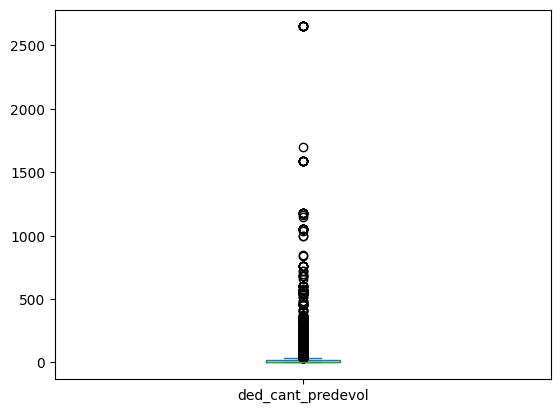

In [728]:
data['ded_cant_predevol'].plot(kind="box")

<Axes: >

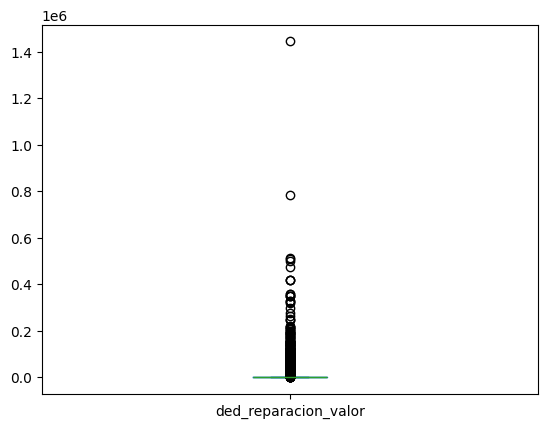

In [729]:
data['ded_reparacion_valor'].plot(kind="box")

<Axes: >

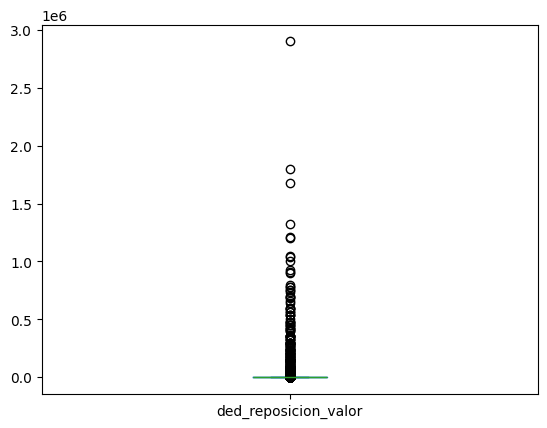

In [730]:
data['ded_reposicion_valor'].plot(kind="box")

<Axes: >

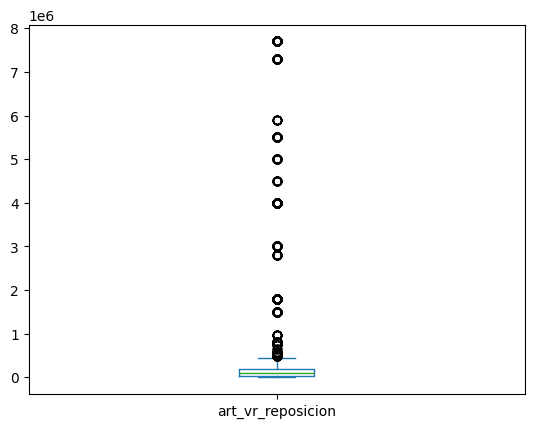

In [731]:
data['art_vr_reposicion'].plot(kind="box")

## Segmentamos categorias
Puesto que variables como **art_nombre**, **cco_nombre**, **cli_nombre** tienen muchas categorias, se seleccionan solo las 8 categorias principales de estas variables

In [732]:
# # prompt: from a dataframe column filter 7 categories and the rest join them together as "Otro
# def filter_categories(df, column_name, top_n=7, other_label='Otro'):
#   value_counts = df[column_name].value_counts()
#   top_categories = value_counts.index[:top_n].tolist()
#   df[column_name] = np.where(df[column_name].isin(top_categories), df[column_name], other_label)
#   return df

# # Example usage:
# # Assuming 'data' is your DataFrame
# data = filter_categories(data, 'art_nombre')
# data = filter_categories(data, 'cco_nombre')
# data = filter_categories(data, 'cli_nombre')

In [733]:
n = 8
#Se escogen los 8 articulos principales
top_categories = data['art_nombre'].value_counts().nlargest(6).index
data = data[data['art_nombre'].isin(top_categories)]
#De los datos resultantes escogemos los 8 obras principales principales
top_categories = data['cco_nombre'].value_counts().nlargest(n).index
data = data[data['cco_nombre'].isin(top_categories)]

#De los datos resultantes escogemos los 8 clientes principales
top_categories = data['cli_nombre'].value_counts().nlargest(n).index
data = data[data['cli_nombre'].isin(top_categories)]


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3184 entries, 11 to 13274
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ded_cant_predevol     3184 non-null   int64   
 1   ded_reparacion_valor  3184 non-null   int64   
 2   ded_reposicion_valor  3184 non-null   int64   
 3   art_nombre            3184 non-null   category
 4   art_vr_reposicion     3184 non-null   int64   
 5   cco_nombre            3184 non-null   category
 6   cli_nombre            3184 non-null   category
dtypes: category(3), int64(4)
memory usage: 181.0 KB


## Creación de nuevas variables

Primero creamos la que sera la variable objetivo que llamaremos estado, esta sera "Bueno" para todas aquellas devoluciones que no registraron ninguna reparación ni reposición, de lo contrario si alguna devolución de algun articulo tuvo cobro por reparación o por reposición se determina como "malo"

In [734]:
data['estado'] = data.apply(lambda row: "Bueno" if row['ded_reparacion_valor'] == 0 and row['ded_reposicion_valor'] == 0  else "Malo", axis=1)

En base a la variable ded_cant_predevol creamos una variable booleana según si hubo predevolución manual o automaticamente generada por el sistema. La razon de esto es debido a que cuando un cliente quiere hacer una devolución llama a la empresa para realizarlo, si el tiene la intención de entregarlo todo entonces el sistema automaticamente llena los valores de la predevolución de acuerdo a lo que tiene alquilado actualmente, de lo contrario si tiene la intención de solo entregar parte del equipo el sistema lo deja en ceros y manualmente la secretaria fija las cantidades que el cliente va a devolver.


In [735]:
data["predevolucion"] = data.apply(lambda row: 1 if row['ded_cant_predevol'] > 0 else 0, axis=1)

dropeamos las columnas que usamos para crear las variables de estado y predevolución

In [736]:
data.drop('ded_reparacion_valor', inplace=True, axis=1)
data.drop('ded_reposicion_valor', inplace=True, axis=1)
data.drop('ded_cant_predevol', inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3184 entries, 11 to 13274
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   art_nombre         3184 non-null   category
 1   art_vr_reposicion  3184 non-null   int64   
 2   cco_nombre         3184 non-null   category
 3   cli_nombre         3184 non-null   category
 4   estado             3184 non-null   object  
 5   predevolucion      3184 non-null   int64   
dtypes: category(3), int64(2), object(1)
memory usage: 156.1+ KB


## ANÁLISIS DE CORRELACIONES PARA REDUNDANCIA

Para ello creamos dummies con los datos actuales, y una vez con todos los datos convertidos a números

In [737]:
for col in data.select_dtypes(['category']).columns:
    data[col] = data[col].cat.remove_unused_categories()

<Axes: xlabel='art_nombre'>

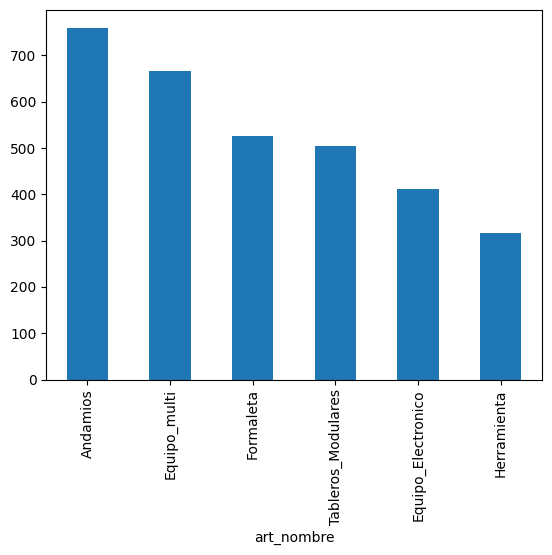

In [738]:
data['art_nombre'].value_counts().plot(kind="bar")

<Axes: xlabel='cco_nombre'>

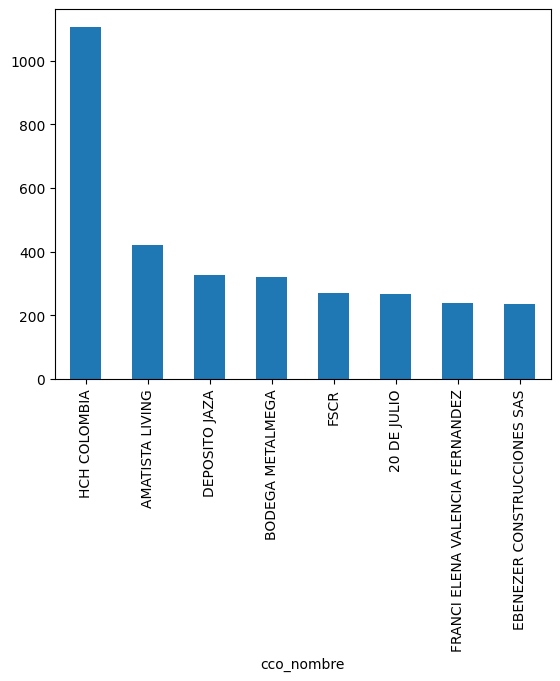

In [739]:
data['cco_nombre'].value_counts().plot(kind="bar")

<Axes: xlabel='cli_nombre'>

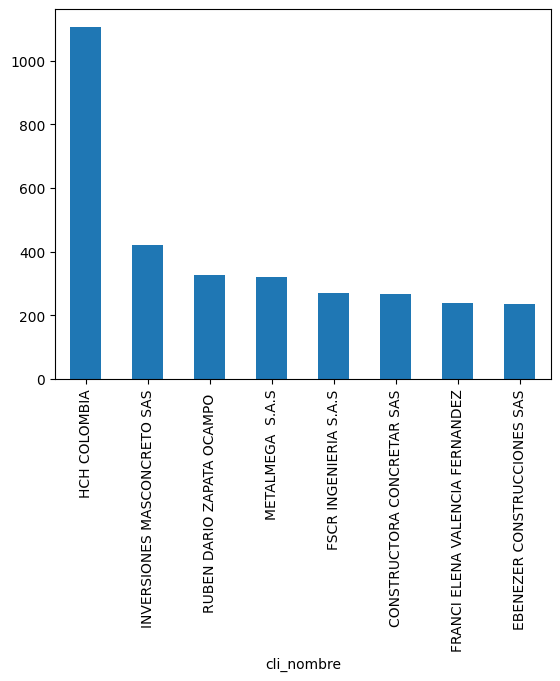

In [740]:
data['cli_nombre'].value_counts().plot(kind='bar')

In [741]:
data_dummies = pd.get_dummies(data, columns=['art_nombre','cli_nombre','cco_nombre'], drop_first=False, dtype=int)

In [742]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'estado' column
data_dummies['estado'] = label_encoder.fit_transform(data_dummies['estado'])

data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3184 entries, 11 to 13274
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   art_vr_reposicion                           3184 non-null   int64
 1   estado                                      3184 non-null   int64
 2   predevolucion                               3184 non-null   int64
 3   art_nombre_Andamios                         3184 non-null   int64
 4   art_nombre_Equipo_Electronico               3184 non-null   int64
 5   art_nombre_Equipo_multi                     3184 non-null   int64
 6   art_nombre_Formaleta                        3184 non-null   int64
 7   art_nombre_Herramienta                      3184 non-null   int64
 8   art_nombre_Tableros_Modulares               3184 non-null   int64
 9   cli_nombre_CONSTRUCTORA CONCRETAR SAS       3184 non-null   int64
 10  cli_nombre_EBENEZER CONSTRUCCIONES SAS 

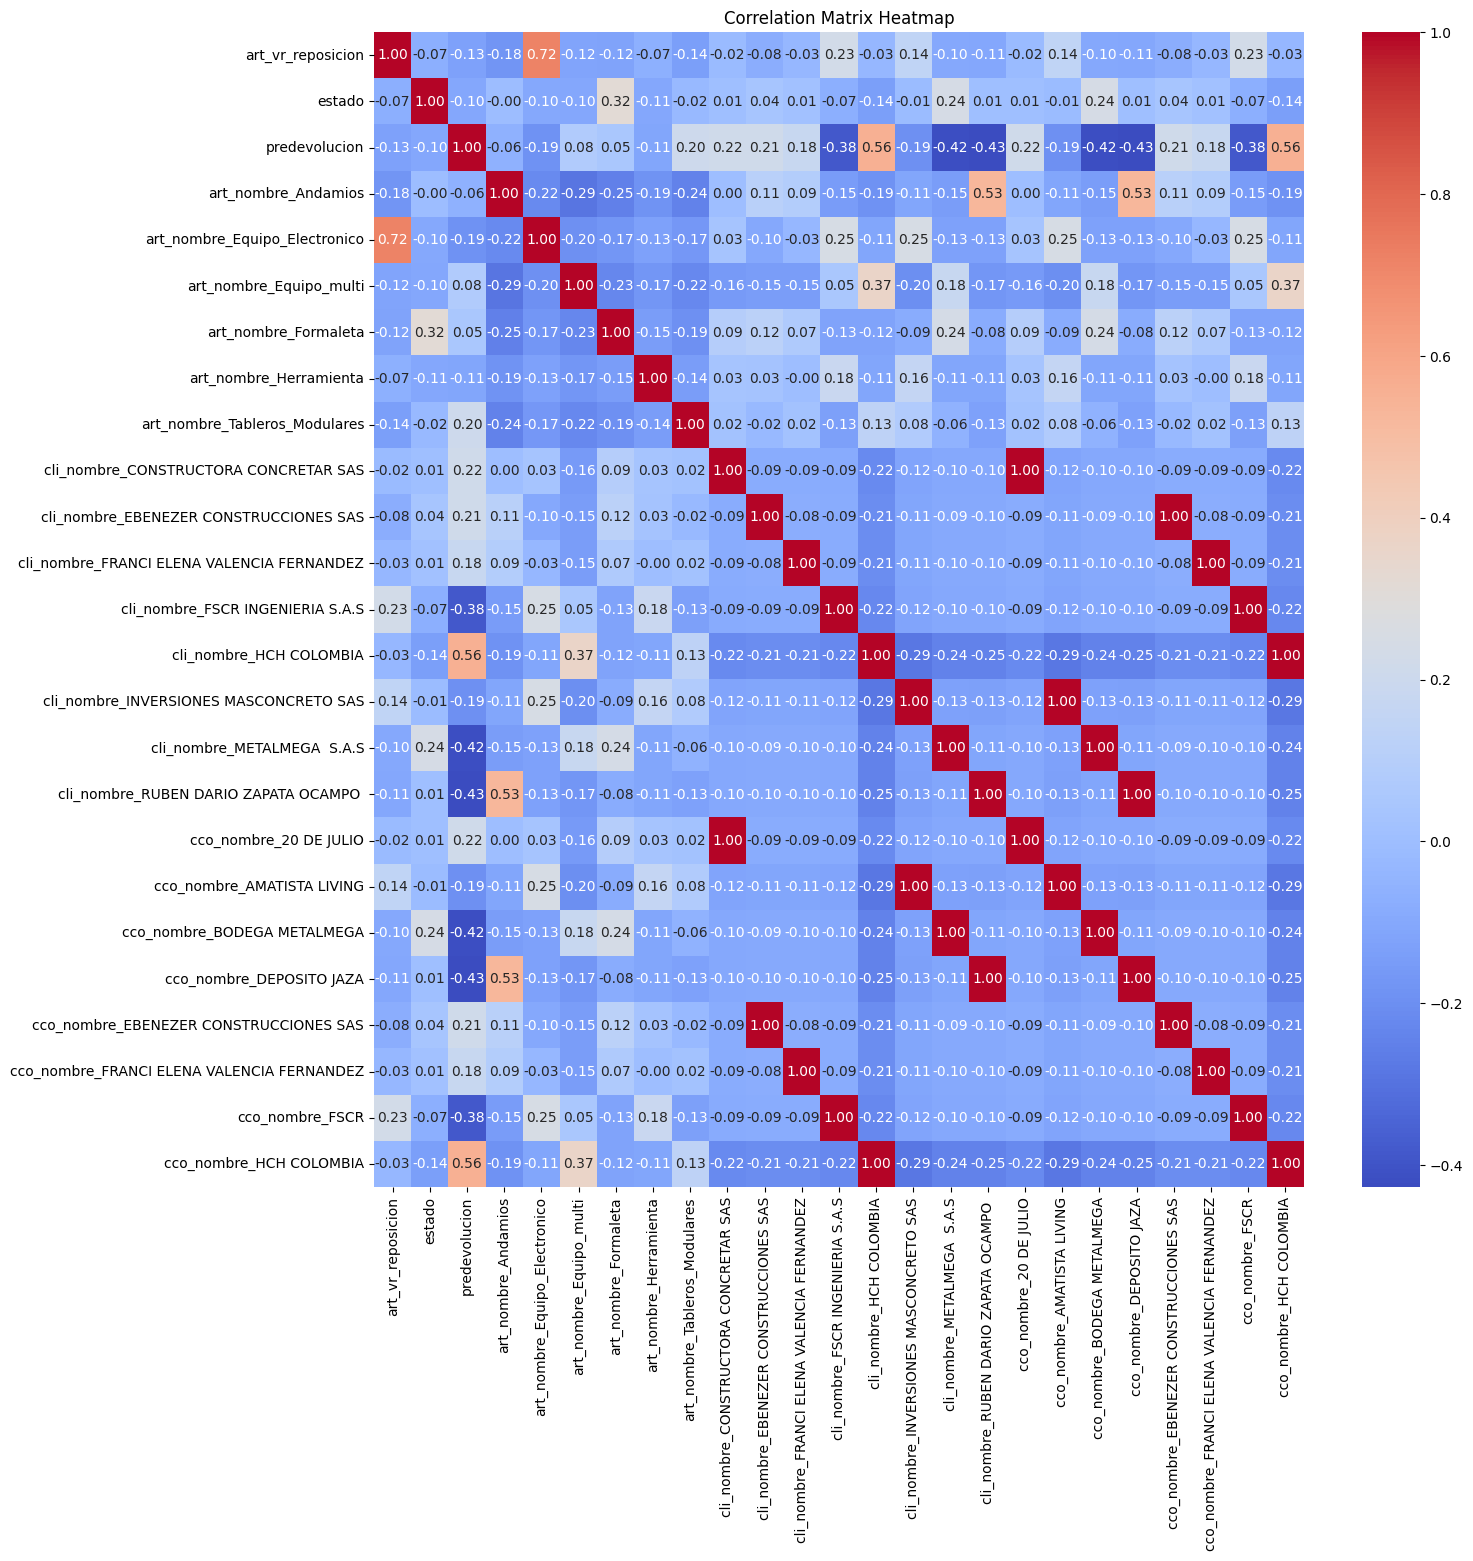

In [743]:
# prompt: create a heatmap for the correlation matrix of data_dummies

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data_dummies.corr()

# Create the heatmap
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Sabemos que hay un problema con las obras y clientes ya que estan altamente correlacionados, esto lo podemos entender debido a que cada obra tiene un cliente. Por tanto debemos eliminar o las obras o los clientes. Para ello guardaremos los datos sin dummies y utilizaremos Weka que nos permite ver la correlación de estas dos variables respecto a la variable objetivo de "estado" sin necesidad de usar dummies.

In [744]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3184 entries, 11 to 13274
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   art_nombre         3184 non-null   category
 1   art_vr_reposicion  3184 non-null   int64   
 2   cco_nombre         3184 non-null   category
 3   cli_nombre         3184 non-null   category
 4   estado             3184 non-null   object  
 5   predevolucion      3184 non-null   int64   
dtypes: category(3), int64(2), object(1)
memory usage: 109.8+ KB


In [745]:
cols = list(data.columns)
a, b = cols.index('estado'), cols.index('predevolucion')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]
data.to_csv("data_weka.csv", index=False)

Las correlaciones que nos entrega WEKA son las siguientes.

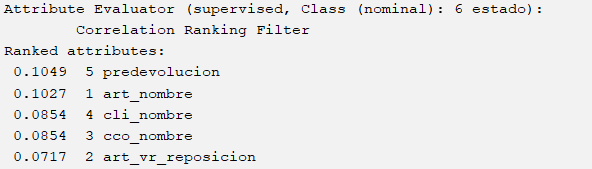

Por tanto por redundancia quitaremos la variable de cli_nombre

In [746]:
data.drop("cli_nombre", inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3184 entries, 11 to 13274
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   art_nombre         3184 non-null   category
 1   art_vr_reposicion  3184 non-null   int64   
 2   cco_nombre         3184 non-null   category
 3   predevolucion      3184 non-null   int64   
 4   estado             3184 non-null   object  
dtypes: category(2), int64(2), object(1)
memory usage: 106.3+ KB


<ipython-input-746-dc92580757da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("cli_nombre", inplace=True, axis=1)


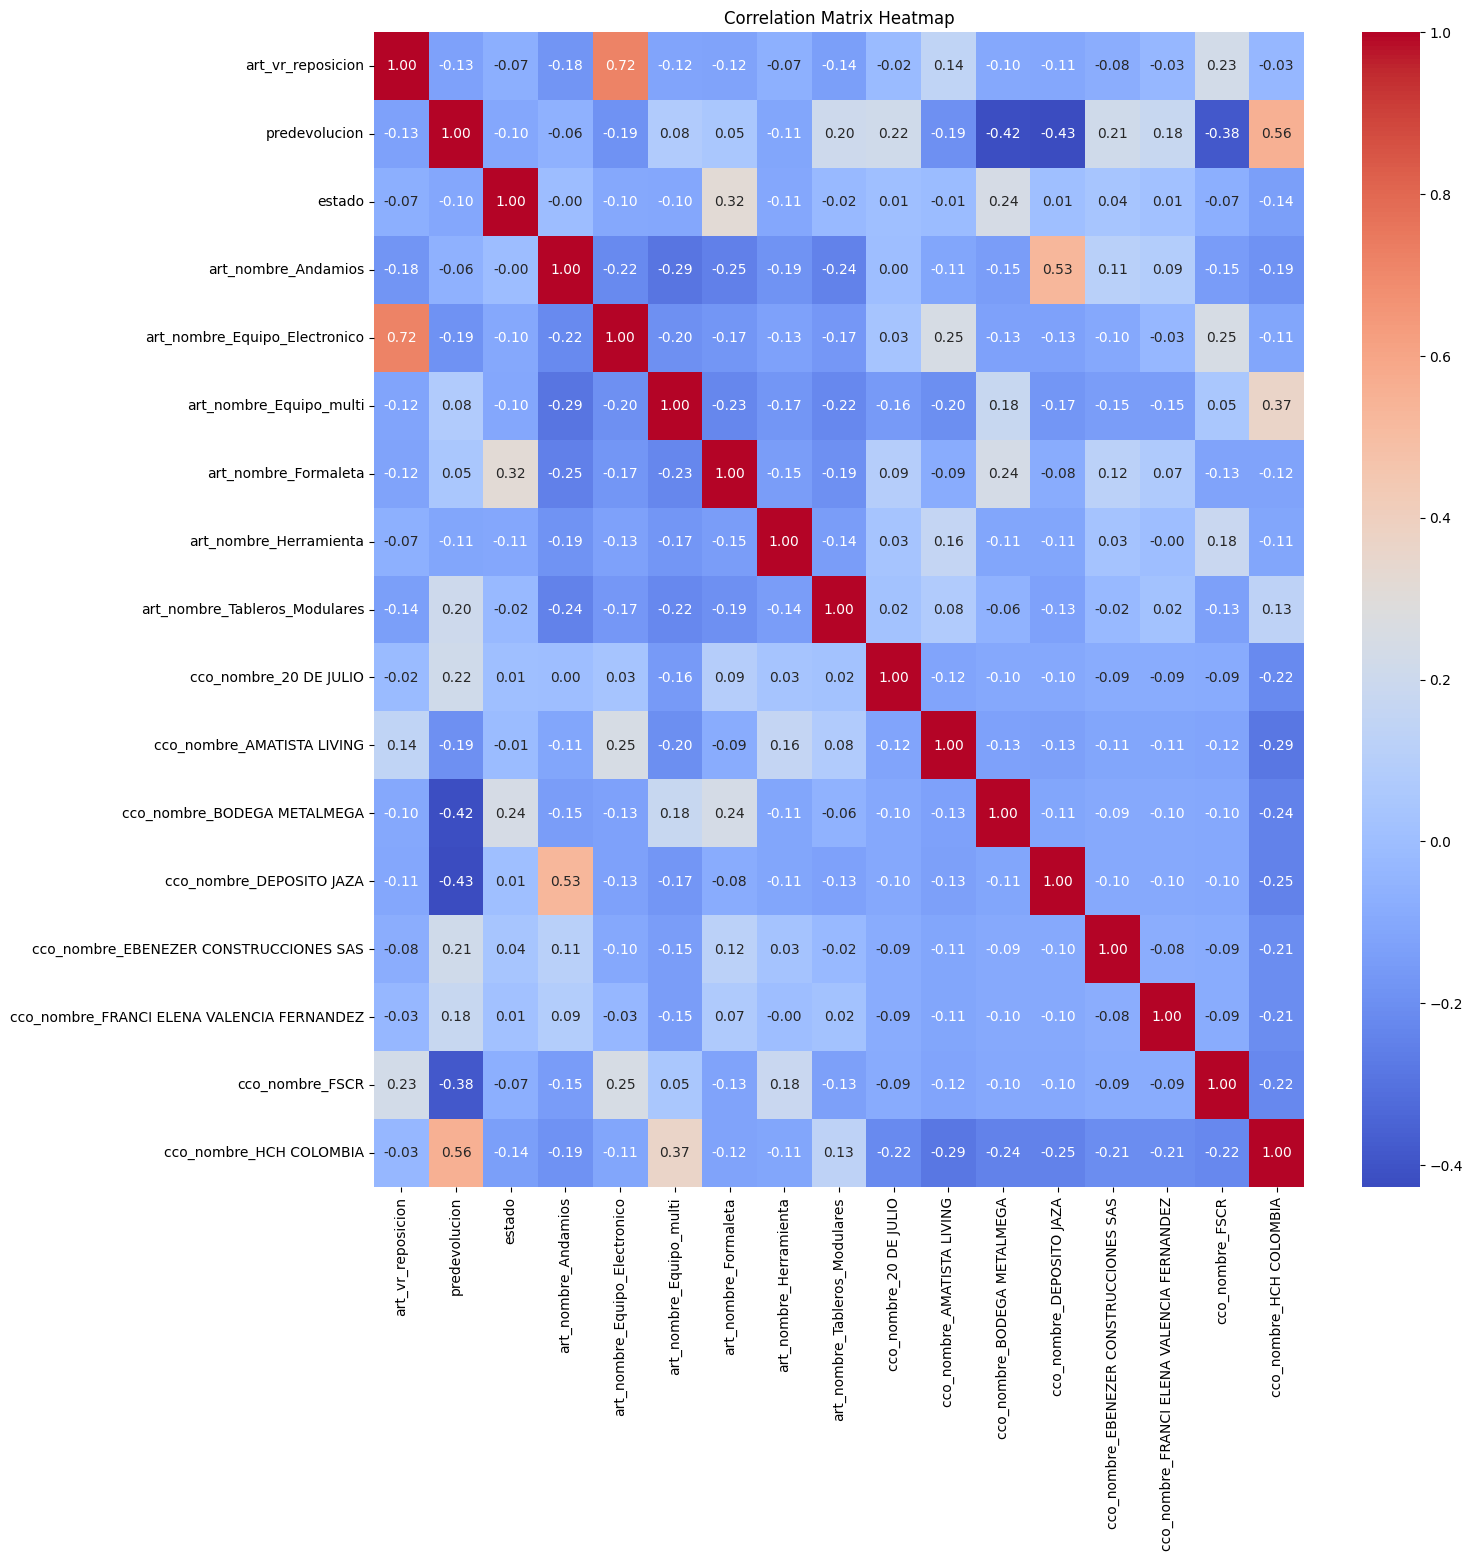

In [747]:
data_dummies = pd.get_dummies(data, columns=['art_nombre','cco_nombre'], drop_first=False, dtype=int)

label_encoder = LabelEncoder()
data_dummies['estado'] = label_encoder.fit_transform(data_dummies['estado'])

correlation_matrix = data_dummies.corr()

# Create the heatmap
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

De resto no encontramos mas variables redundantes según el criterio de |f(x1,x2)| > 0.8

## ANÁLISIS DE CORRELACIONES PARA IRRELEVANCIA (PREDICCIONES)

Usando el criterio de que |corr(x,y)| < 0.05 para considerarse una variable irrelevante, no eliminamos ninguna variable predictora por irrelevancia, según los resultados entregados por WEKA en el CorrelationAttributeEval

---

In [748]:
data['estado'] = data['estado'].astype('category')
data.drop('predevolucion', inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3184 entries, 11 to 13274
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   art_nombre         3184 non-null   category
 1   art_vr_reposicion  3184 non-null   int64   
 2   cco_nombre         3184 non-null   category
 3   estado             3184 non-null   category
dtypes: category(3), int64(1)
memory usage: 59.8 KB


<BarContainer object of 16 artists>

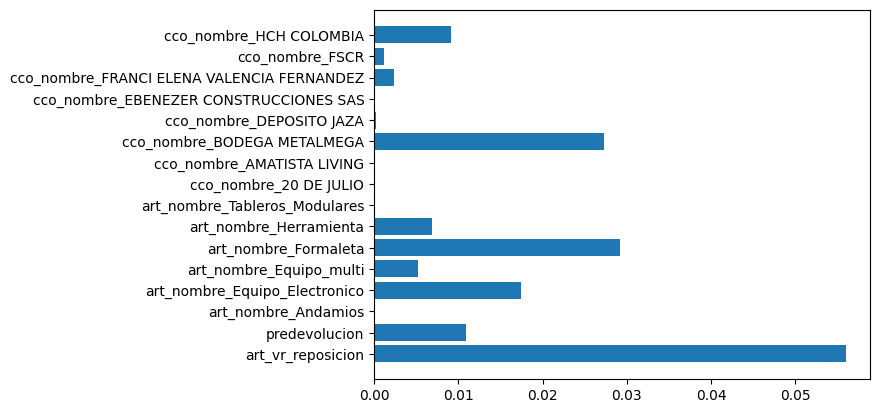

In [749]:
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
Xtrain=data_dummies.drop('estado', axis=1)
Ytrain=data_dummies["estado"]
M=pd.DataFrame()
M=mutual_info_classif(Xtrain,Ytrain,n_neighbors=4,random_state=42)
M
M.shape
plt.barh(y = Xtrain.columns, width=M)

<Axes: xlabel='estado'>

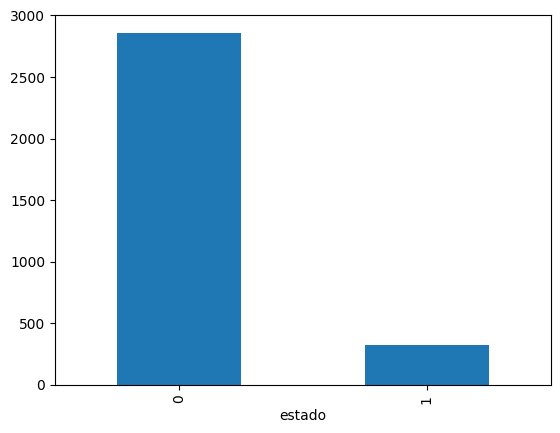

In [750]:
data_dummies['estado'].value_counts().plot(kind="bar")

## Balanceo

<Axes: xlabel='estado'>

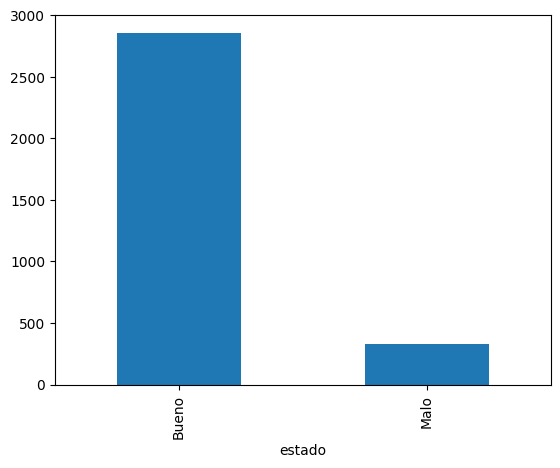

In [751]:
data['estado'].value_counts().plot(kind="bar")

In [752]:
data.to_csv('data_no_balanceada.csv', index=False)

In [753]:
from imblearn.over_sampling import SMOTENC
# Encode categorical features (Feature1 is at index 0)
categorical_features = [0,2]  # Index of categorical features in X

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42, sampling_strategy=0.6)
X = data[['art_nombre', 'art_vr_reposicion', 'cco_nombre']]
y = data['estado']
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

<Axes: xlabel='estado'>

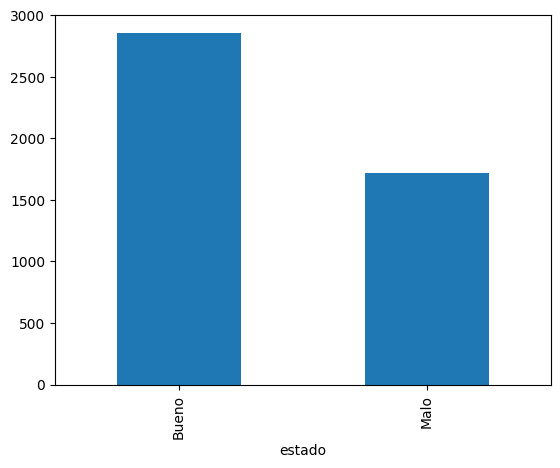

In [754]:
y_resampled.value_counts().plot(kind="bar")

## Transformaciones

Para métodos númericos

In [755]:
from sklearn.preprocessing import MinMaxScaler

data_num = data.copy()
data_num = pd.get_dummies(data_num, columns=['art_nombre','cco_nombre'], drop_first=False, dtype=int)

label_encoder = LabelEncoder()
data_num['estado'] = label_encoder.fit_transform(data_num['estado'])

min_max_scaler = MinMaxScaler()
variables_numericas=['art_vr_reposicion']
min_max_scaler.fit(data_num[variables_numericas]) #Ajuste de los parametros: max - min

data_num[variables_numericas]= min_max_scaler.transform(data_num[variables_numericas]) #70%
data_num.head()

data_num

,art_vr_reposicion,estado,art_nombre_Andamios,art_nombre_Equipo_Electronico,art_nombre_Equipo_multi,art_nombre_Formaleta,art_nombre_Herramienta,art_nombre_Tableros_Modulares,cco_nombre_20 DE JULIO,cco_nombre_AMATISTA LIVING,cco_nombre_BODEGA METALMEGA,cco_nombre_DEPOSITO JAZA,cco_nombre_EBENEZER CONSTRUCCIONES SAS,cco_nombre_FRANCI ELENA VALENCIA FERNANDEZ,cco_nombre_FSCR,cco_nombre_HCH COLOMBIA
11,0.003896,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
53,0.000260,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
54,0.019481,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
55,0.010390,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
64,0.038571,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,0.026494,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
13271,0.005195,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
13272,0.000260,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
13273,0.012468,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [756]:
data_num.to_csv('data_balanced_transformed.csv', index=False)